In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()


In [4]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


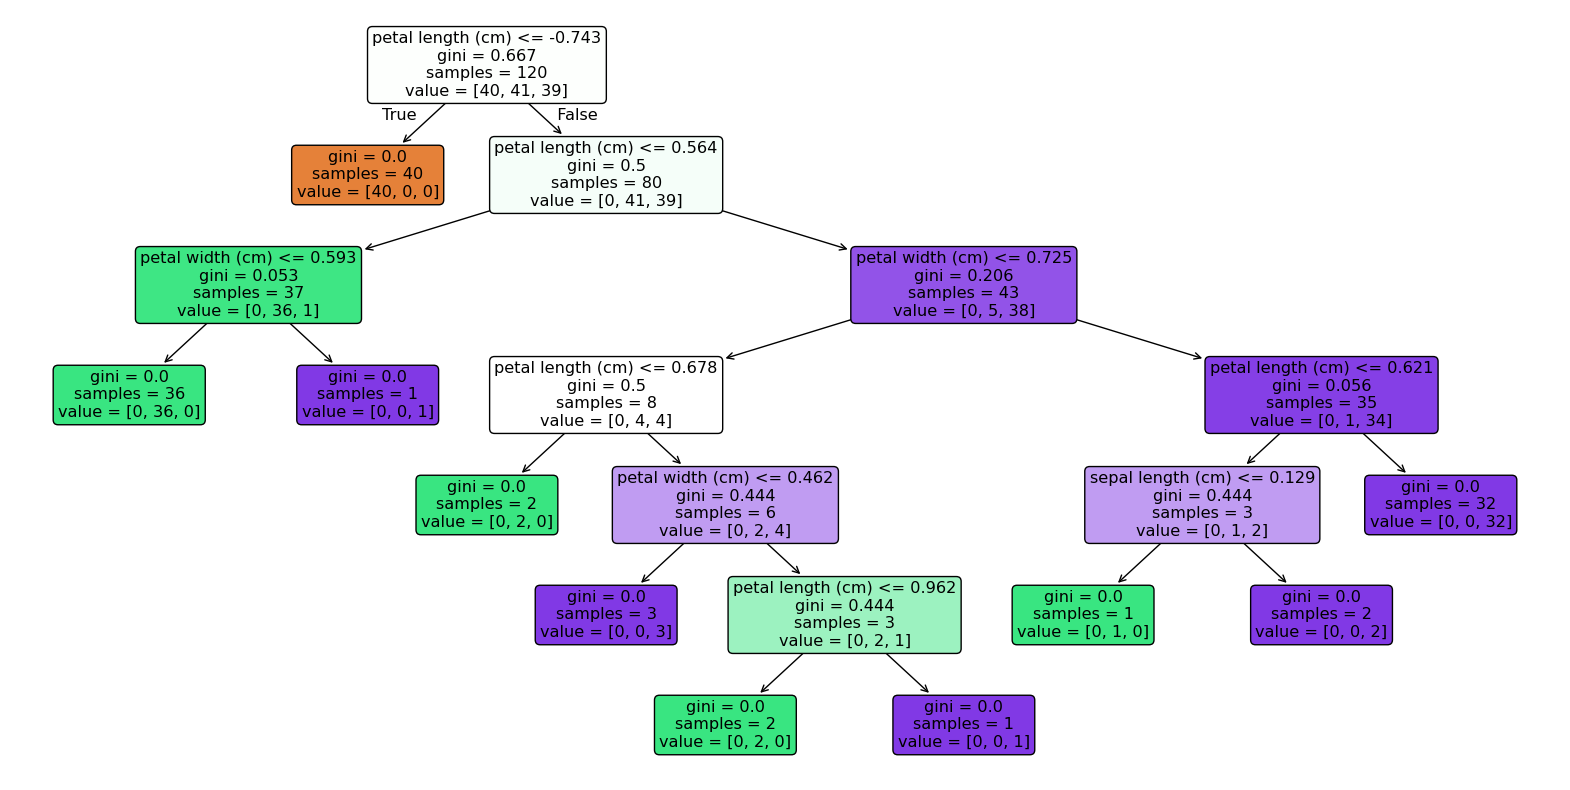

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, rounded=True, feature_names=iris.feature_names)
plt.show()


In [7]:
new_data = [[5.0, 3.5, 1.5, 0.2]]  # Example new data point
scaled_new_data = scaler.transform(new_data)
prediction = model.predict(scaled_new_data)
print(f'Predicted class: {iris.target_names[prediction][0]}')

Predicted class: setosa


c:\Users\RAKESH\ml_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\RAKESH\ml_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


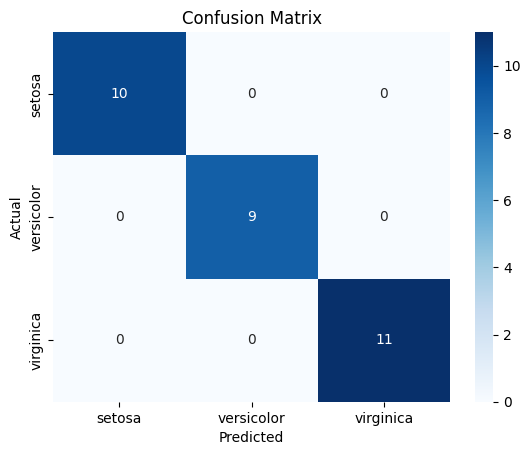

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [9]:
import joblib  # or import pickle

# Assuming you have your trained model in 'model' variable
joblib.dump(model, 'model.pkl')


['model.pkl']